In [2]:
import sys
sys.path.append('.')
import argparse
import os
from collections import OrderedDict

import numpy as np
import torch

from data.muscleData_NormSeq import mpgRobotSeq

In [4]:
def generate_pam_data_set(data, percentage_imputation):
    train_targets = data.train_targets
    test_targets = data.test_targets

    train_obs = data.train_obs
    test_obs = data.test_obs

    rs = np.random.RandomState(seed=42)
    train_obs_valid = rs.rand(train_targets.shape[0], train_targets.shape[1], 1) < 1 - percentage_imputation
    train_obs_valid[:, :5] = True
    print("Fraction of Valid Train Observations:",
          np.count_nonzero(train_obs_valid) / np.prod(train_obs_valid.shape))
    rs = np.random.RandomState(seed=23541)
    test_obs_valid = rs.rand(test_targets.shape[0], test_targets.shape[1], 1) < 1 - percentage_imputation
    test_obs_valid[:, :5] = True
    print("Fraction of Valid Train Observations:", np.count_nonzero(test_obs_valid) / np.prod(test_obs_valid.shape))

    train_act = data.train_acts
    test_act = data.test_acts

    return torch.from_numpy(train_obs).float(), torch.from_numpy(train_act).float(), torch.from_numpy(
        train_obs_valid).bool(), torch.from_numpy(train_targets).float(), torch.from_numpy(
        test_obs).float(), torch.from_numpy(test_act).float(), torch.from_numpy(
        test_obs_valid).bool(), torch.from_numpy(test_targets).float()

In [5]:
"""Data"""
tar_type = 'delta'  #'delta' - if to train on differences to current states
                    #'next_state' - if to trian directly on the  next states
data = mpgRobotSeq(targets=tar_type, standardize=True)
impu = 0.75
train_obs, train_act, train_obs_valid, train_targets, test_obs, test_act, test_obs_valid, test_targets = generate_pam_data_set(
    data, impu)
act_dim = train_act.shape[-1]

Fraction of Valid Train Observations: 0.5639124012701108
Fraction of Valid Test Observations: 0.5638726790450929
>>>>>>>>>>>>>>>>>>>>>>>>>>> Training On Differences <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
>>>>>>>>>>>>>>>>>>>>>>>>>Standardizing The Data<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Fraction of Valid Train Observations: 0.34608751028206014
Fraction of Valid Train Observations: 0.34597701149425286


In [7]:
train_obs

tensor([[[ 0.0905,  1.2986,  1.4959, -0.1440],
         [ 0.0905,  1.3087,  1.4959, -0.1440],
         [ 0.0905,  1.3291,  1.4959, -0.1440],
         ...,
         [ 0.1238,  1.6241,  1.4959, -0.1440],
         [ 0.1238,  1.6241,  1.4959, -0.1440],
         [ 0.1238,  1.6241,  1.4959, -0.1440]],

        [[-0.0858,  0.1692,  1.9843,  0.2865],
         [-0.0883,  0.1692,  1.8857,  0.2865],
         [-0.0883,  0.1692,  1.8857,  0.2865],
         ...,
         [ 0.7881, -0.0241, -0.9478,  0.3354],
         [ 0.7472, -0.0444, -0.8761,  0.3452],
         [ 0.6986, -0.0342, -0.8291,  0.3501]],

        [[-1.0286, -2.9949, -0.9075,  0.3794],
         [-1.0286, -3.2085, -0.9052,  0.3794],
         [-1.0286, -3.4324, -0.9142,  0.3794],
         ...,
         [-0.9647, -4.5413, -0.7148,  0.3696],
         [-0.9698, -4.5413, -0.7126,  0.3696],
         [-0.9698, -4.5413, -0.7104,  0.3696]],

        ...,

        [[ 3.4351,  0.6067, -1.0486,  0.3647],
         [ 3.4351,  0.5355, -1.0105,  0.3843]

In [14]:
print(train_obs.shape, train_act.shape)

torch.Size([5798, 39, 4]) torch.Size([5798, 39, 8])


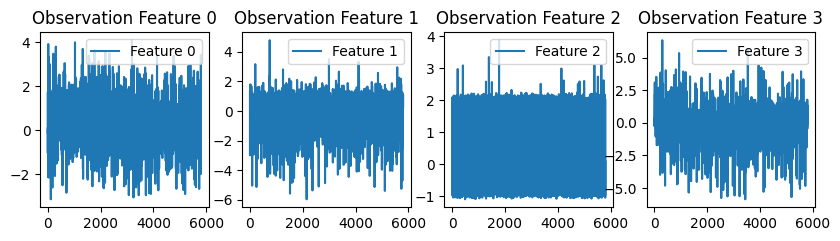

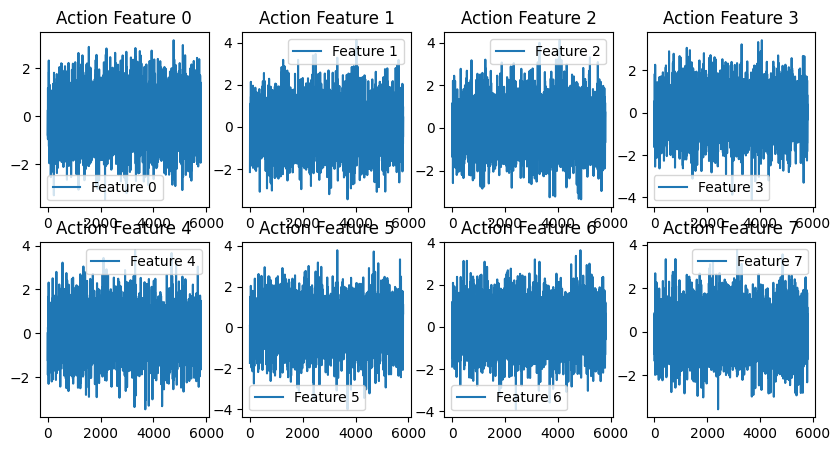

In [15]:
import matplotlib.pyplot as plt
import torch

# Assuming train_obs and train_act are your tensors

# Selecting the first element of the second dimension and all elements of the third dimension
sample_obs = train_obs[:, 0, :]
sample_act = train_act[:, 0, :]

# Creating a plot
plt.figure(figsize=(10, 5))

# Plotting each feature in sample_obs
for i in range(sample_obs.shape[1]):
    plt.subplot(2, 4, i+1)
    plt.plot(sample_obs[:, i].numpy(), label=f'Feature {i}')
    plt.title(f'Observation Feature {i}')
    plt.legend()

# Plotting each feature in sample_act
plt.figure(figsize=(10, 5))
for i in range(sample_act.shape[1]):
    plt.subplot(2, 4, i+1)
    plt.plot(sample_act[:, i].numpy(), label=f'Feature {i}')
    plt.title(f'Action Feature {i}')
    plt.legend()

plt.show()
